In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import math
import matplotlib as mpl
from iminuit import Minuit

In [2]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

# Set the background color of the plot to ghostwhite
axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'lightgreen', 'orange', 'orchid', 'navy']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Exercise 1

In [3]:
N_trials = 10**5 
N_cases = 5
Nbins = 100

def ratio(x1, N_tot, N_bins): 
    a = 2 * x1 * np.log(N_bins / N_tot * x1)
    b = 2 * (N_tot - x1) * np.log(N_bins / N_tot * (N_tot - x1) / (N_bins - 1))
    return a + b

# Background cases has u_sig = 0 and u_bkg = 0.1, 10, 1000
# Signal cases has u_sig = 100, 200 and u_bkg = 1000

u_background = np.array([0.1, 10, 1000, 1000, 1000])
u_signal = np.array([0, 0, 0, 100, 200])

ratio_vals = np.zeros((N_cases, N_trials))

for i in range(N_cases): 
    for j in range(N_trials): 
        bin_counts = np.random.poisson(u_background[i], Nbins)

        if i >= 3:   
            bin_counts[0] += np.random.poisson(u_signal[i])

        if bin_counts[0] == 0: 
            continue
        else:
            N_tot = np.sum(bin_counts)
            ratio_vals[i, j] = ratio(bin_counts[0], N_tot, Nbins)

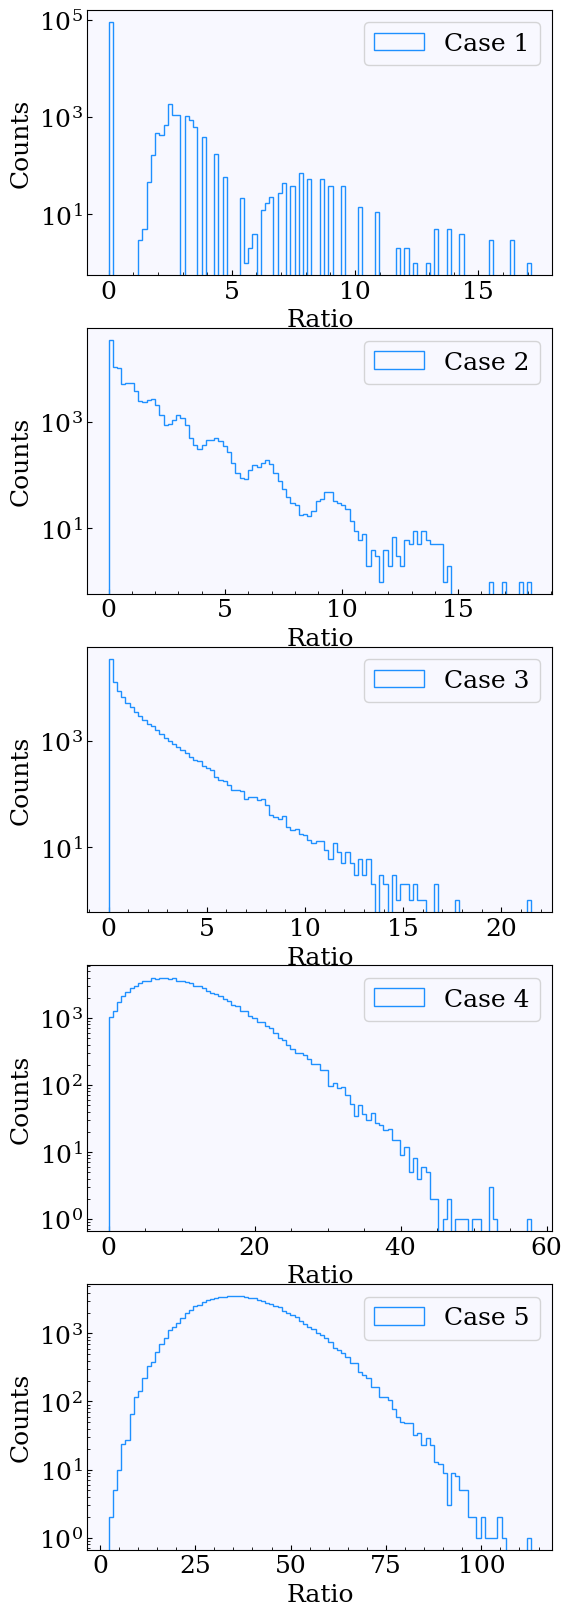

In [4]:
# Plot a histogram for the ratio of each case

fig, ax = plt.subplots(5, 1, figsize=(6, 20))

for i in range(N_cases):
    ax[i].hist(ratio_vals[i, :], bins=100, histtype='step', label=f'Case {i+1}')
    ax[i].set_xlabel('Ratio')
    ax[i].set_ylabel('Counts')
    ax[i].set_yscale('log')
    ax[i].legend()

# Exercise 2

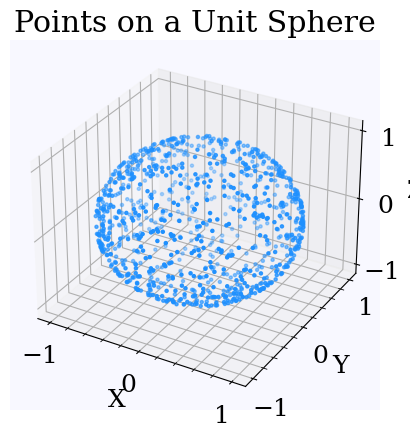

In [5]:
from mpl_toolkits.mplot3d import Axes3D

def generate_points_on_sphere(num_points):
    points = []

    while len(points) < num_points:
        
        # Generate random points in a unit cube
        x, y, z = np.random.rand(3)
        
        # Transform to spherical coordinates
        r = 1.0
        theta = 2 * np.pi * x
        phi = np.arccos(2 * y - 1)
        
        # Convert to Cartesian coordinates
        x_sphere = r * np.sin(phi) * np.cos(theta)
        y_sphere = r * np.sin(phi) * np.sin(theta)
        z_sphere = r * np.cos(phi)
        
        points.append((x_sphere, y_sphere, z_sphere))
    
    return np.array(points)

# Generate points on the surface of a unit sphere
num_points = 1000
points = generate_points_on_sphere(num_points)

# Plot the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], s=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Points on a Unit Sphere')
plt.show()

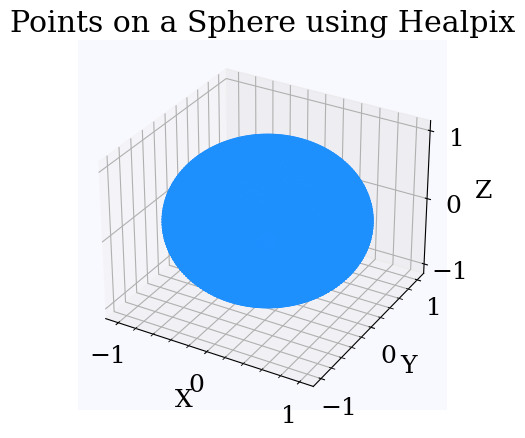

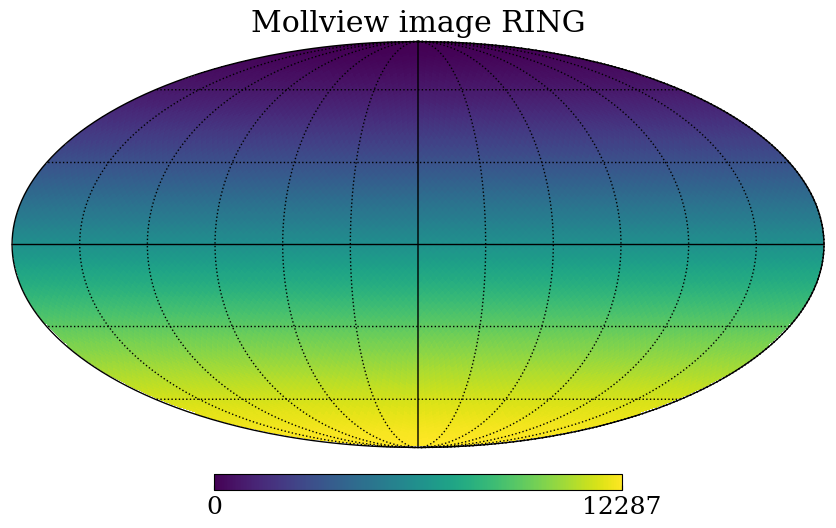

In [6]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Generate random points on a sphere using Healpix
nside = 32
npix = hp.nside2npix(nside) 
theta, phi = hp.pix2ang(nside, np.arange(npix))

# Convert to Cartesian coordinates
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Plot the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Points on a Sphere using Healpix')

# Plot this in 2D 

m = np.arange(npix)
hp.mollview(m, title="Mollview image RING")
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
ipix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(10))
m[ipix_disc] = m.max()
hp.graticule()
